# Kaggle案例泰坦尼克號生存預測分析


## 查看數據<br>
用pandas加載數據

In [1]:
import pandas as pd #數據分析
import numpy as np #科學計算
from pandas import Series,DataFrame
data_train = pd.read_csv("Train.csv")
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

有以下這些字段<br>
PassengerId => 乘客ID<br>
Pclass => 乘客等级(1/2/3等艙位)<br>
Name => 乘客姓名<br>
Sex => 性别<br>
Age => 年齡<br>
SibSp => 堂兄弟/妹個數<br>
Parch => 父母與小孩個數<br>
Ticket => 船票信息<br>
Fare => 票價<br>
Cabin => 客艙<br>
Embarked => 登船港口

### 數據簡單描述性分析

In [2]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 訓練數據中總共有891名乘客，但是我们有些屬性的數據不全，比如说：<br>

* Age（年齡）屬性只有714名乘客有紀錄
* Cabin（客艙）更是只有204名乘客是已知的<br>
具體數據數值情况，我们用下列的方法，得到數值型數據的一些分布

In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


mean字段告訴我們，大概0.383838的人最後獲救了，平均乘客年齡大概是29.7歲

# 通過可視化的方式深入了解數據

## 獲救情况人數可視化

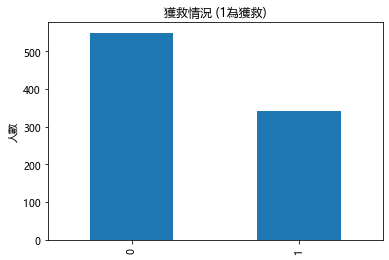

0    549
1    342
Name: Survived, dtype: int64


In [8]:
import matplotlib.pyplot as plt #繪圖工具 

from pylab import mpl #顯示中文
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默認字體 
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False 

fig = plt.figure()
fig.set(alpha=0.2)  # 設定圖表颜色alpha參數
data_train.Survived.value_counts().plot(kind='bar')
plt.title("獲救情況 (1為獲救)")
plt.ylabel("人數")  
plt.show()
print(data_train.Survived.value_counts())


## 乘客等级分布可視化

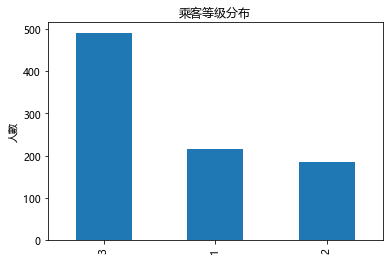

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [9]:
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel("人數")
plt.title("乘客等级分布")
plt.show()
print(data_train.Pclass.value_counts())

## 按年齡看獲救分布可視化

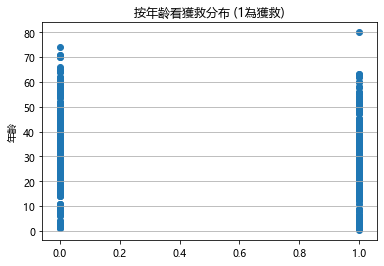

In [10]:
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年齡")                         
plt.grid(True,axis='y') 
plt.title("按年齡看獲救分布 (1為獲救)")
plt.show()

## 各等级的乘客年齡分布

####  kind參數——'line', 'bar', 'barh', 'kde':
密度圖：與直方圖相關的一種類型圖，是通過計算“可能會產生觀測數據的連續概率分布的估計”而產生的，通過给plot傳入參數kind = 'kde' 即可。<br>
直方圖：是一種可以對值頻率離散化顯示的柱狀圖。通過調用Series.hist()方法即可創建。<br>
散布圖：是觀測兩個一维數據序列之間關係的有效手段，使用pd.scatter_matrix()即可建立。<br>

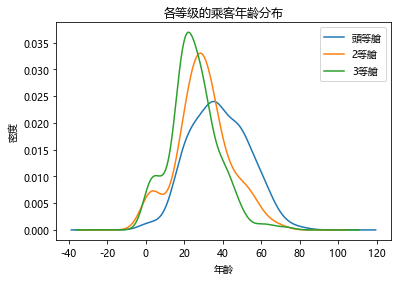

In [11]:
# 各等級的乘客年齡分布密度圖
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年齡")
plt.ylabel("密度") 
plt.title("各等级的乘客年齡分布")
plt.legend(('頭等艙', '2等艙','3等艙')) 
plt.show()

## 各登船口岸上船人数可視化

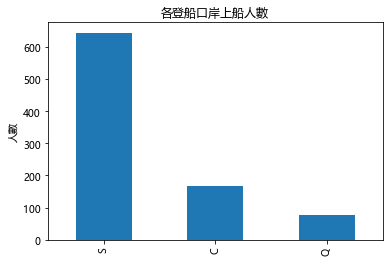

In [12]:
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人數")
plt.ylabel("人數")  
plt.show()

### 所以我們在圖上可以看出来:<br>
* 被救的人300多點，不到半數；<br>
* 3等艙乘客非常多；遇難和獲救的人年齡跨度都很廣；<br>
* 3个不同的艙年齡總體趨勢似乎也一致，2/3等艙乘客20歲多點的人最多，1等艙40歲左右的最多<br>
* 登船港口人數按照S、C、Q遞减，而且S遠多於另外兩港口。><br><br>

## 查看每一個屬性與獲救情况的可視化


## 各乘客等級的獲救情况

<Figure size 432x288 with 0 Axes>

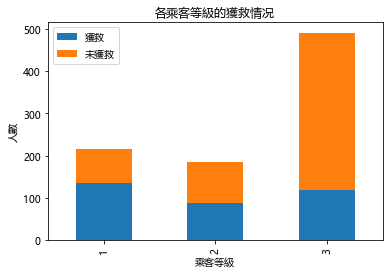

,獲救,未獲救
1,136,80
2,87,97
3,119,372


In [13]:
#看看各乘客等級的獲救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 設定圖表颜色alpha參數

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'獲救':Survived_1, '未獲救':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("各乘客等級的獲救情况")
plt.xlabel("乘客等級") 
plt.ylabel("人數") 
plt.legend()
plt.show()
df
# Survived_0
# Survived_1 

## 各性别的獲救情况

<Figure size 432x288 with 0 Axes>

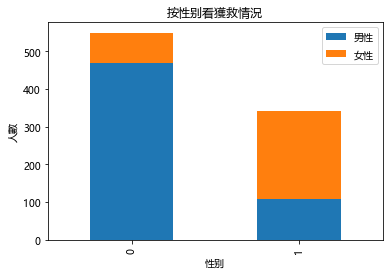

,男性,女性
0,468,81
1,109,233


In [14]:
#看看各性别的獲救情況
fig = plt.figure()
fig.set(alpha=0.2)  # 設定圖表顏色alpha參數

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({'男性':Survived_m, '女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title("按性别看獲救情況")
plt.xlabel("性别") 
plt.ylabel("人數")
plt.legend()
plt.show()
df
# Survived_m
# Survived_f

### 堂兄弟和父母字段對於獲救情況分析


In [15]:
# 堂兄弟/妹個數
g = data_train.groupby(['SibSp','Survived'])
g
df = pd.DataFrame(g.count()['PassengerId'])
df.head(8)

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4

In [16]:
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df.head()

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40

#### ticket是船票编號，是unique的，和最後的结果没有太大的關係，不納入考虑的特徵範疇  
#### cabin只有204个乘客有值，我們先看看它的一個分布

In [17]:
#cabin只有204個乘客有值，我們先看看它的一個分布
data_train.Cabin.value_counts().head(20)

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
C22 C26        3
E101           3
D              3
F2             3
B20            2
D33            2
B58 B60        2
C2             2
B51 B53 B55    2
C93            2
C125           2
C52            2
B49            2
F4             2
C123           2
D26            2
Name: Cabin, dtype: int64

<Figure size 432x288 with 0 Axes>

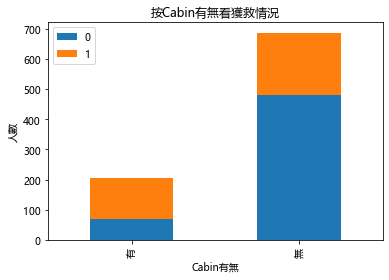

,0,1
有,68,136
無,481,206


In [18]:
#分析cabin這個值的有無，對於survival的分布狀況
fig = plt.figure()
fig.set(alpha=0.2)  # 設定圖表颜色alpha參數

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({'有':Survived_cabin, '無':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title("按Cabin有無看獲救情況")
plt.xlabel("Cabin有無") 
plt.ylabel("人數")
plt.show()
df

有Cabin紀錄的似乎獲救概率稍高一些

## 數據預處理

In [19]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 數據缺失值處理

In [20]:
data_train.head(10)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
#補充Age的缺失值
data_train['Age']=data_train['Age'].fillna(data_train['Age'].mean())
#按Cabin有無數據，將這個屬性處理成Yes和No兩種類型
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df
data_train = set_Cabin_type(data_train)

In [22]:
#對Embarked進行填充數據
data_train['Embarked']=data_train['Embarked'].fillna('S')

In [23]:
data_train.head(10)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


## 數據one-hot處理

因為邏輯回歸建模時，需要輸入的特徵都是數值型特徵，我們通常會先對類目型的特徵因子化/one-hot編碼<br>
什麼叫做因子化/one-hot編碼？舉個例子<br>
以Embarked為例，原本一个屬性維度，因為其取值可以是[‘S’,’C’,’Q‘]，而將其平展開為’Embarked_C’,’Embarked_S’, ‘Embarked_Q’三個屬性<br>
* 原本Embarked取值為S的，在此處的”Embarked_S”下取值為1，在’Embarked_C’, ‘Embarked_Q’下取值為0<br>
* 原本Embarked取值為C的，在此處的”Embarked_C”下取值為1，在’Embarked_S’, ‘Embarked_Q’下取值為0<br>
* 原本Embarked取值為Q的，在此處的”Embarked_Q”下取值為1，在’Embarked_C’, ‘Embarked_S’下取值為0<br>
* 我們使用pandas的”get_dummies”來完成這個工作，並拼接在原來的”data_train”之上<br>

In [25]:
# 因為邏輯回歸建模時，需要输入的特徵都是數值型特徵
# 我們先對類目型的特徵離散/因子化
# 以Cabin為例，原本一个屬性维度，因為其取值可以是['yes','no']，而將其平展開為'Cabin_yes','Cabin_no'兩個属性
# 原本Cabin取值為yes的，在此處的'Cabin_yes'下取值為1，在'Cabin_no'下取值為0
# 原本Cabin取值為no的，在此處的'Cabin_yes'下取值為0，在'Cabin_no'下取值為1
# 我們使用pandas的get_dummies來完成這個工作，並拼接在原来的data_train之上，如下所示
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,29.699118,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


## 數據標准化處理

我们還得做一些處理，Age和Fare兩個屬性，乘客的數值幅度變化太大,進行標准差標准化處理

In [26]:
a=df.Age
df['Age_scaled'] = (a - a.mean()) / (a.std())
df=df.drop('Age',axis=1)
b=df.Fare
df['Fare_scaled'] = (b - b.mean()) / (b.std())
df=df.drop('Fare',axis=1)
df.head(10)

,PassengerId,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,-5.921480e-01,-0.502163
1,2,1,1,0,0,1,1,0,0,1,0,1,0,0,6.384304e-01,0.786404
2,3,1,0,0,1,0,0,0,1,1,0,0,0,1,-2.845034e-01,-0.488580
3,4,1,1,0,0,1,0,0,1,1,0,1,0,0,4.076970e-01,0.420494
4,5,0,0,0,1,0,0,0,1,0,1,0,0,1,4.076970e-01,-0.486064
5,6,0,0,0,1,0,0,1,0,0,1,0,0,1,4.371893e-15,-0.477848
6,7,0,0,0,0,1,0,0,1,0,1,1,0,0,1.869009e+00,0.395591
7,8,0,3,1,1,0,0,0,1,0,1,0,0,1,-2.130371e+00,-0.223957
8,9,1,0,2,1,0,0,0,1,1,0,0,0,1,-2.075923e-01,-0.424018
9,10,1,1,0,1,0,1,0,0,1,0,0,1,0,-1.207437e+00,-0.042931


## 數據建模--邏輯回歸

我們把需要的feature字段取出來，轉成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [27]:
# 我們把需要的feature字段取出來，轉成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values
# y即Survival结果
y = train_np[:, 0]
# y
# X即特徵屬性值
X = train_np[:, 1:]
# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(penalty='l1', tol=1e-4)
clf.fit(X, y)  
# clf
# y
# X
print("模型正確率："+str(clf.score(X,y)))

模型正確率：0.8125701459034792


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


penalty：懲罰項，str類型，可選參數為l1和l2，默認為l2。用於指定懲罰項中使用的規範。newton-cg、sag和lbfgs求解算法只支持L2規範。L1G規範假設的是模型的參數滿足拉普拉斯分布，L2假設的模型參數滿足高斯分布，所謂的范式就是加上對參數的约束，使得模型更不會過擬合(overfit)<br>
tol：停止求解的標准，float類型，默認為1e-4。就是求解到多少的時候，停止，認為已經求出最優解。<br>
c：正則化系數λ的倒數，float類型，默認為1.0。必需是正浮點型數。像SVM一樣，越小的數值表示越强的正則化。<br>

接下來咱們對訓練集和測試集做一樣的操作

In [28]:
# 讀取測試集數據
data_test = pd.read_csv("test.csv")
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [29]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
data_test = pd.read_csv("test.csv")
# 接著我們對test_data做和train_data中一致的特徵變換
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
#補充Age的缺失值
data_test['Age']=data_test['Age'].fillna(data_test['Age'].mean())
#按Cabin有無數據，將這個屬性處理成Yes和No兩種類型
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df
data_train = set_Cabin_type(data_test)

# one-hot編碼
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# 標准化處理數據
a=df_test.Age
df_test['Age_scaled'] = (a - a.mean()) / (a.std())
df_test=df_test.drop('Age',axis=1)
b=df_test.Fare
df_test['Fare_scaled'] = (b - b.mean()) / (b.std())
df_test=df_test.drop('Fare',axis=1)
df_test.head(6)

,PassengerId,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,0,0,1,0,0,1,0,0,1,0,0,1,0.334592,-0.496043
1,893,1,0,1,0,0,0,1,1,0,0,0,1,1.323944,-0.510885
2,894,0,0,1,0,0,1,0,0,1,0,1,0,2.511166,-0.462780
3,895,0,0,1,0,0,0,1,0,1,0,0,1,-0.259019,-0.481127
4,896,1,1,1,0,0,0,1,1,0,0,0,1,-0.654760,-0.416242
5,897,0,0,1,0,0,0,1,0,1,0,0,1,-1.287945,-0.471059


In [31]:
# from sklearn.metrics import accuracy_score 
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

In [32]:
pd.read_csv("logistic_regression_predictions.csv").head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
